In [6]:
import os
import pandas as pd
from scipy import interpolate
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

thermistor_data_path = os.path.join('10k_littlefuse.csv')
thermistor_data = pd.read_csv(thermistor_data_path)

<IPython.core.display.Javascript object>


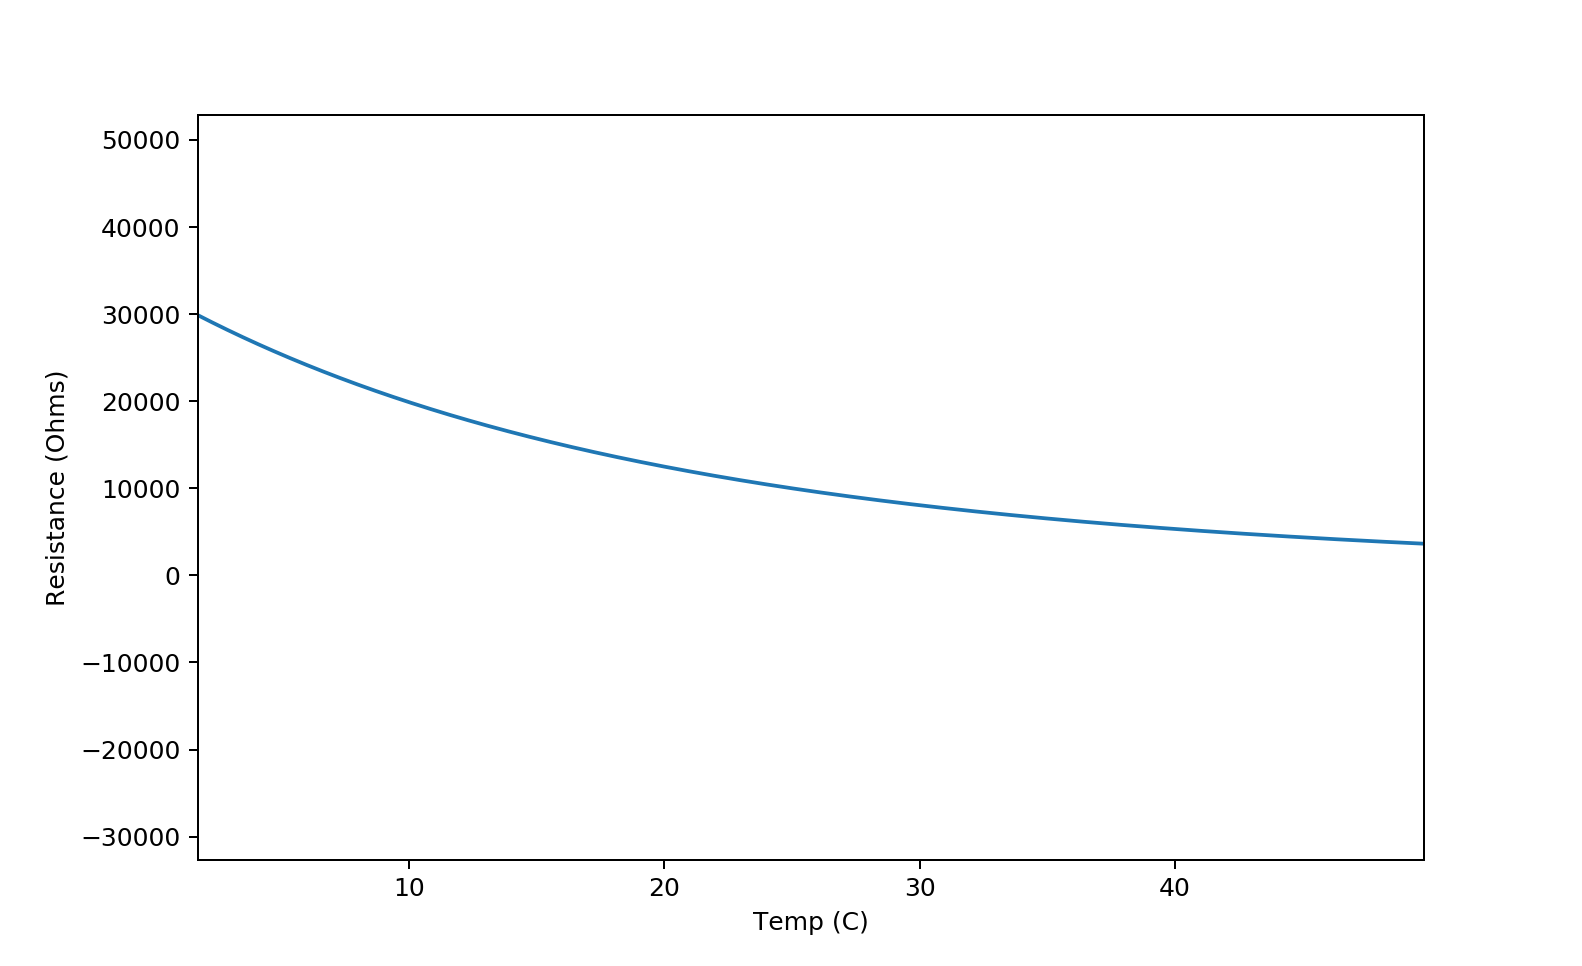

In [8]:
THERMISTOR_LUT_TEMP_TO_RES = interpolate.interp1d(thermistor_data['Temp (C)'], thermistor_data['Resistance (Ohms)'],) # Converts temp in C to Resistance in Ohms
THERMISTOR_LUT_RES_TO_TEMP = interpolate.interp1d(thermistor_data['Resistance (Ohms)'], thermistor_data['Temp (C)']) # Converts Resistance in Ohms to temp in C
%matplotlib notebook

plt.figure()
sns.lineplot(x = 'Temp (C)', y ='Resistance (Ohms)', data = thermistor_data)
plt.show()

In [17]:
SENSOR_CURRENT = 100e-6

def temp_to_voltage(temp):
    ''' Convert the temp value to a voltage
    '''
    voltage = SENSOR_CURRENT*THERMISTOR_LUT_TEMP_TO_RES(temp)
    return voltage

def voltage_to_temp(voltage):
    ''' Convert the temp value to a voltage
    '''
    resistance = voltage/SENSOR_CURRENT
    temp = float(THERMISTOR_LUT_RES_TO_TEMP(resistance))
    return temp

In [22]:
voltage_to_temp(0.516)


40.78926499032882

In [20]:
voltage_to_temp(2.72)

3.6165463385884777